In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

In [60]:
apps = pd.read_csv('googleplaystore.csv', dtype = {'Reviews':'int'})

In [69]:
category = apps['Category'].values
category = np.unique(category)

In [42]:
df = pd.DataFrame(apps[['Rating', 'Reviews']])
# df['Cluster'] = pd.cut(df.Reviews, bins=[0,100,1000,10000,10000000000], labels=[1,2,3,4])

In [43]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [44]:
df.values

array([[4.10000e+00, 1.59000e+02],
       [3.90000e+00, 9.67000e+02],
       [4.70000e+00, 8.75100e+04],
       ...,
       [        nan, 3.00000e+00],
       [4.50000e+00, 1.14000e+02],
       [4.50000e+00, 3.98307e+05]])

In [53]:
df = df.fillna(0)
X = df[['Rating', 'Reviews']].values

In [55]:
scaler = StandardScaler()

X_std = scaler.fit_transform(X)

clt = KMeans(n_clusters=2)

model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))

df['Cluster'] = clusters

df.head()

,Rating,Reviews,Cluster
0,4.1,159,0
1,3.9,967,0
2,4.7,87510,0
3,4.5,215644,0
4,4.3,967,0


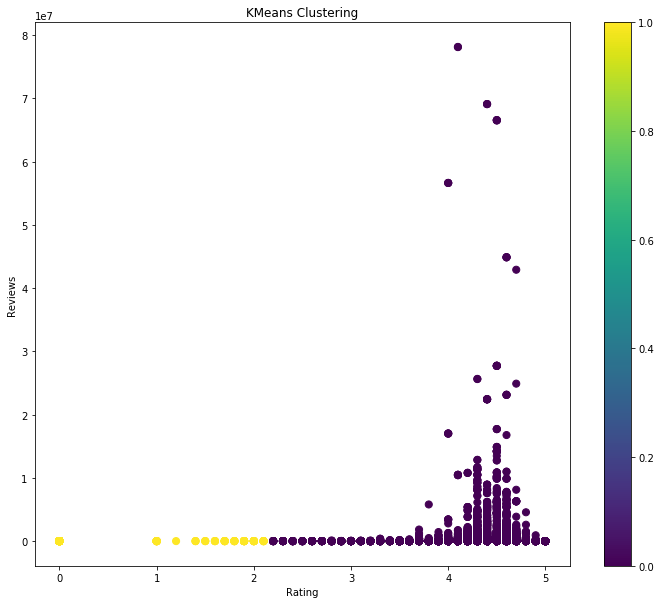

In [56]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df['Rating'], df['Reviews'], c=df['Cluster'],s=50)
ax.set_title('KMeans Clustering')
ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
plt.colorbar(scatter); 
plt.show()